SVM could be used to perform linear, nonlinear classification and regression with complex but low sample size data.

### Excercise 1: Use linear SVC, SVC and SGDclassfier to classify a linearly seperable dataset. 

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
iris = datasets.load_iris()
X = iris.data[:, (2,3)]
y = iris.target

# Choose only two classes to seperate
setosa_or_versicolor = (y==0) | (y==1)
X = X[setosa_or_versicolor].reshape(-1,2)
y = y[setosa_or_versicolor].reshape(-1,1)

In [3]:
# Set up the three classifer
C = 5
alpha = 1/(C * X.shape[0])

lin_clf = LinearSVC(loss='hinge', C=C)
svc_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss='hinge', learning_rate="constant", eta0=0.001, alpha=alpha, n_iter=100000, random_state=42)

scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svc_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print('Linear SVC:', lin_clf.intercept_, lin_clf.coef_)
print('SVC:', svc_clf.intercept_, svc_clf.coef_)
print('sgd', sgd_clf.intercept_, sgd_clf.coef_)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Linear SVC: [ 0.284812] [[ 1.0554249  1.0985195]]
SVC: [ 0.31933577] [[ 1.1223101   1.02531081]]
sgd [ 0.32] [[ 1.12293103  1.02620763]]


In [4]:
scaler.mean_

array([ 2.862,  0.785])

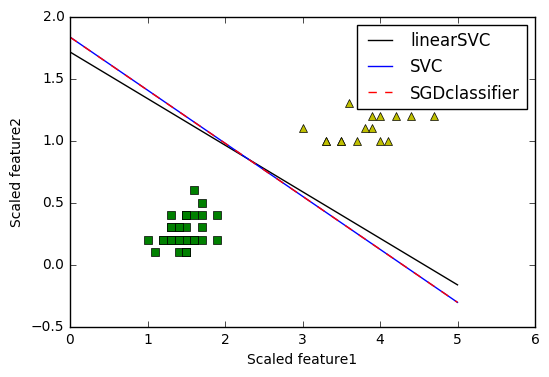

In [5]:
# Scale the parameters based on the scaler
lin_clf_coef = lin_clf.coef_[0]/scaler.scale_
svc_clf_coef = svc_clf.coef_[0]/scaler.scale_
sgd_clf_coef = sgd_clf.coef_[0]/scaler.scale_

# Plot the decision boundary of the classifier
b1 = lin_clf.decision_function([-scaler.mean_ / scaler.scale_])/lin_clf_coef[1]
w1 = -lin_clf_coef[0]/lin_clf_coef[1]
b2 = svc_clf.decision_function([-scaler.mean_ / scaler.scale_])/svc_clf_coef[1]
w2 = -svc_clf_coef[0]/svc_clf_coef[1]
b3 = sgd_clf.decision_function([-scaler.mean_ / scaler.scale_])/sgd_clf_coef[1]
w3 = -sgd_clf_coef[0]/sgd_clf_coef[1]

# Generate the original plot
plt.plot(X[np.where(y==0)[0],0], X[np.where(y==0)[0],1], 'gs')
plt.plot(X[np.where(y==1)[0],0], X[np.where(y==1)[0],1], 'y^')
plt.xlabel('Scaled feature1')
plt.ylabel('Scaled feature2')

# Calculate decision results
x_plot = np.linspace(0,5,100)

y_deci1 = x_plot*w1-b1
y_deci2 = x_plot*w2-b2
y_deci3 = x_plot*w3-b3

plt.plot(x_plot, y_deci1, 'k', label='linearSVC')
plt.plot(x_plot, y_deci2, 'b', label='SVC')
plt.plot(x_plot, y_deci3, 'r--', label='SGDclassifier')
plt.legend()

### Exercise:

Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?

First, let's load the dataset and split it into a training set and a test set. We could use train_test_split() but people usually just take the first 60,000 instances for the training set, and the last 10,000 instances for the test set (this makes it possible to compare your model's performance with others):

In [11]:
# Load teh MNIST dataset
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
X = mnist["data"]
y = mnist["target"]
data_len = X.shape[0]

X_train = X[:60000].reshape(60000, -1)
y_train = y[:60000].reshape(60000, -1)
X_test = X[60000:].reshape(data_len-60000, -1)
y_test = y[60000:].reshape(data_len-60000, -1)

In [12]:
# Shuffle the training dataset
rand_idx = np.random.permutation(60000)
X_train_shuffle = X_train[rand_idx]
y_train_shuffle = y_train[rand_idx]

In [ ]:
lin_clf=LinearSVC()
lin_clf.fit(X_train_shuffle, y_train_shuffle)

In [10]:
from sklearn.metrics import accuracy_score
y_pred = lin_clf.predict(X_test)
accuracy_score(y_pred, y_test)

ValueError: X has 784 features per sample; expecting 2

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_shuffle)
X_test_scaled = scaler.transform(X_test)

NameError: name 'X_train_shuffle' is not defined

In [119]:
lin_clf=LinearSVC()
lin_clf.fit(X_train_scaled, y_train_shuffle)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [121]:
X_test_scaled = scaler.transform(X_test)
y_pred = lin_clf.predict(X_test_scaled)
accuracy_score(y_pred, y_test)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


0.91149999999999998

In [127]:
# Perform hyperparameter search on a small dataset
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C":uniform(1,10)}
rnd_search_CV = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2)
rnd_search_CV.fit(X_train_scaled[:1000], y_train[:1000])

NameError: name 'svm_clf' is not defined

In [125]:
reciprocal(0.001, 0.1)